#Import các thư viện cần thiết và đọc dữ liệu

In [ ]:
#import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('STU_Dataset.csv')

#Kiểm tra dữ liệu đầu vào

In [ ]:
# Kiểm tra xem có trùng lặp không
duplicate_ids = df['Student ID'].duplicated().sum()
print(f"Số lượng Student ID trùng lặp: {duplicate_ids}")

# Kiểm tra giá trị không rỗng
study_hours_not_empty = df['Study Hours per Week'].notnull().sum()
print(f"Số lượng giá trị không rỗng trong Study Hours per Week: {study_hours_not_empty}")

Study_Hours_per_Week_missing = df['Study Hours per Week'].isnull().sum()
print(f"Số lượng giá trị bị thiếu trong Study Hours per Week: {Study_Hours_per_Week_missing}")
# Kiểm tra xem có phải là số không
study_hours_is_numeric = df['Study Hours per Week'].apply(lambda x: isinstance(x, (int, float))).sum()
print(f"Số lượng giá trị là số trong Study Hours per Week: {study_hours_is_numeric}")

# Kiểm tra phạm vi
study_hours_in_range = df['Study Hours per Week'] >= 0
print(f"Số lượng giá trị trong phạm vi >= 0: {study_hours_in_range.sum()}")

attendance_rate_not_empty = df['Attendance Rate'].notnull().sum()
print(f"Số lượng giá trị không rỗng trong Attendance Rate: {attendance_rate_not_empty}")

attendance_rate_is_numeric = df['Attendance Rate'].apply(lambda x: isinstance(x, (int, float))).sum()
print(f"Số lượng giá trị là số trong Attendance Rate: {attendance_rate_is_numeric}")

attendance_rate_in_range = df['Attendance Rate'].between(0, 100).sum()
print(f"Số lượng giá trị trong phạm vi 0-100: {attendance_rate_in_range}")

previous_grades_not_empty = df['Previous Grades'].notnull().sum()
print(f"Số lượng giá trị không rỗng trong Previous Grades: {previous_grades_not_empty}")

previous_grades_is_numeric = df['Previous Grades'].apply(lambda x: isinstance(x, (int, float))).sum()
print(f"Số lượng giá trị là số trong Previous Grades: {previous_grades_is_numeric}")

previous_grades_in_range = df['Previous Grades'].between(0, 100).sum()
print(f"Số lượng giá trị trong phạm vi 0-100: {previous_grades_in_range}")

# Kiểm tra số lượng giá trị bị thiếu trong cột 'Passed'
passed_missing = df['Passed'].isnull().sum() + (df['Passed'] == 'nan').sum()
print(f"Số lượng giá trị bị thiếu trong Passed: {passed_missing}")


Số lượng Student ID trùng lặp: 0
Số lượng giá trị không rỗng trong Study Hours per Week: 38005
Số lượng giá trị bị thiếu trong Study Hours per Week: 1995
Số lượng giá trị là số trong Study Hours per Week: 40000
Số lượng giá trị trong phạm vi >= 0: 37064
Số lượng giá trị không rỗng trong Attendance Rate: 38008
Số lượng giá trị là số trong Attendance Rate: 40000
Số lượng giá trị trong phạm vi 0-100: 33866
Số lượng giá trị không rỗng trong Previous Grades: 38006
Số lượng giá trị là số trong Previous Grades: 40000
Số lượng giá trị trong phạm vi 0-100: 37525
Số lượng giá trị bị thiếu trong Passed: 2000


#Tiền xử lý dữ liệu

In [ ]:
# Tạo một bản sao của DataFrame
data = df.copy()

# Kiểm tra và xử lý các giá trị không hợp lệ
# Số giờ học trung bình phải là số dương
data.loc[(data['Study Hours per Week'] < 0), 'Study Hours per Week'] = None
# Kiểm tra giá trị trong 'Attendance Rate' có nằm trong phạm vi 0-100
data.loc[(data['Attendance Rate'] < 0) | (data['Attendance Rate'] > 100), 'Attendance Rate'] = None

# Kiểm tra giá trị trong 'Previous Grades' có nằm trong phạm vi 0-100
data.loc[(data['Previous Grades'] < 0) | (data['Previous Grades'] > 100), 'Previous Grades'] = None

# Thay thế giá trị "nan" bằng NaN
data['Passed'] = data['Passed'].replace('nan', np.nan)

# Xóa những hàng mà cột 'Passed' có giá trị null
data = data.dropna(subset=['Passed'])

data = data.drop_duplicates()
data.to_csv('valid_records.csv', index=False)

print("\nSố lượng bản ghi hợp lệ:", len(data))
print(data.shape)
#Kiểm tra dữ liệu
# print("Thông tin tập dữ liệu:")
# print(data.info())
# print("\nMô tả dữ liệu:")
# print(data.describe())

# #Kiểm tra kiểu dữ liệu
# print("\nKiểu dữ liệu sau khi xử lý:")
# print(data.dtypes)


Số lượng bản ghi hợp lệ: 38000
(38000, 5)


#Trực quan hóa dữ liệu

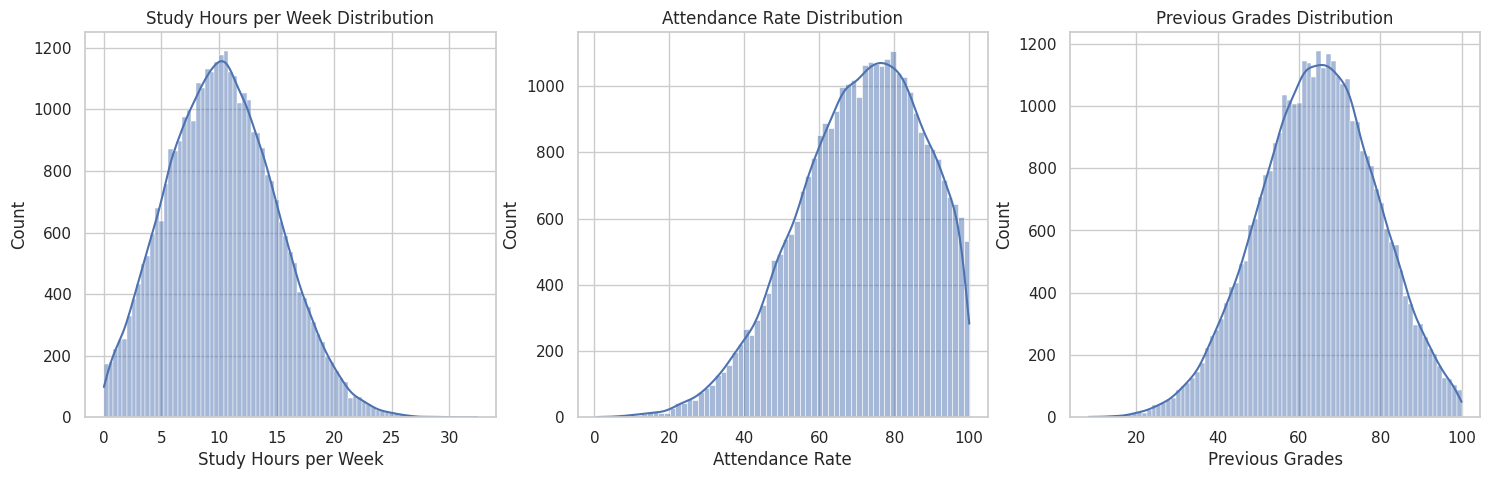

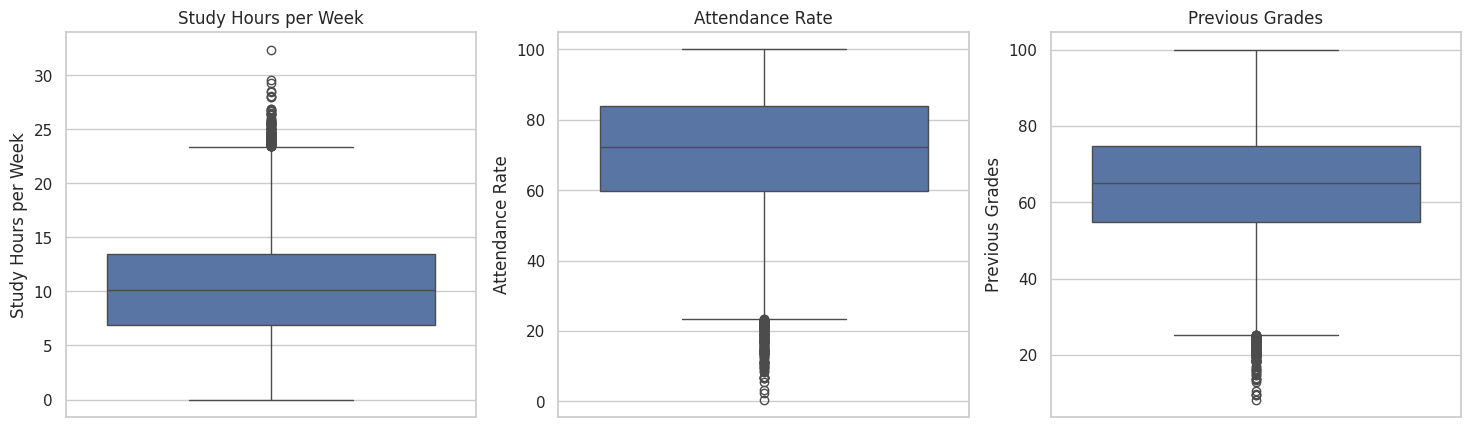

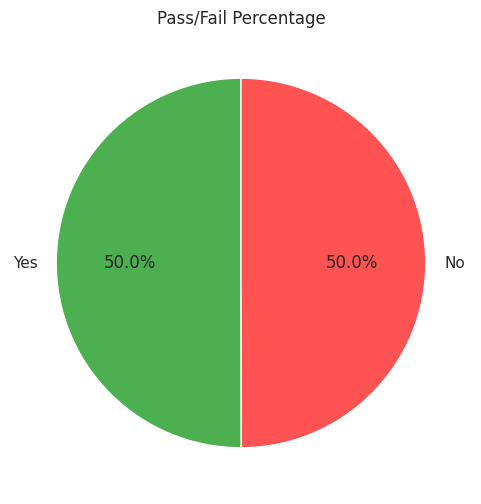

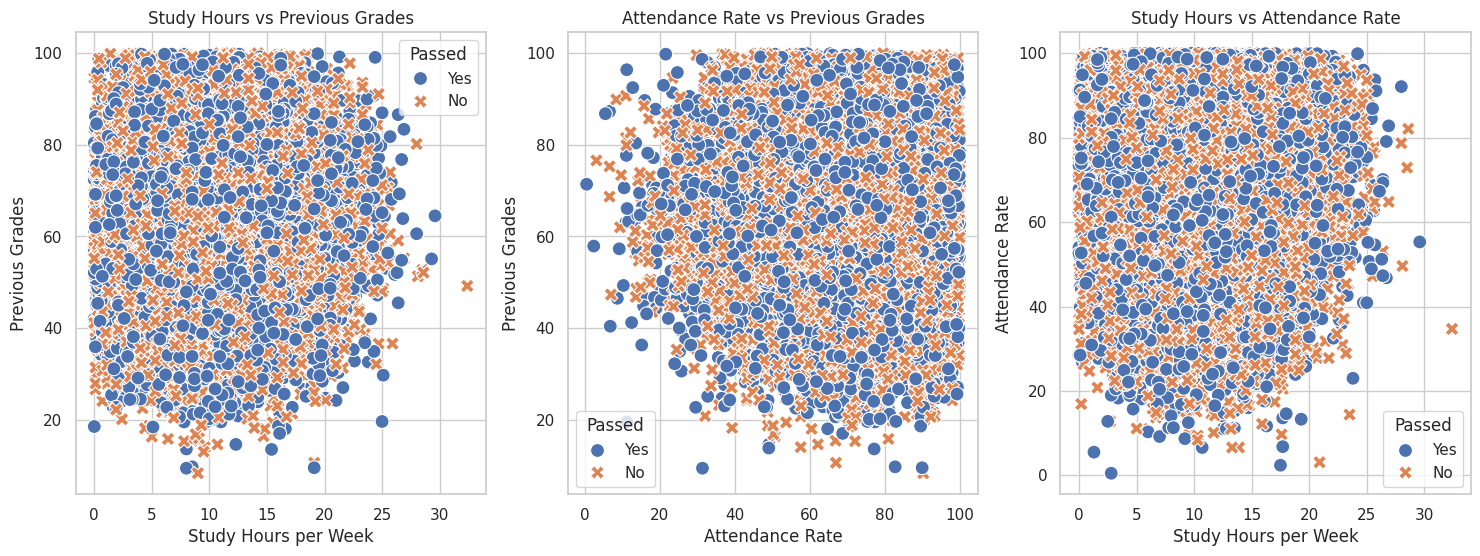

In [ ]:
# Thiết lập kiểu hiển thị
sns.set(style="whitegrid")

# 1. Histogram cho các cột số
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Study Hours per Week'], kde=True, ax=axs[0]).set(title='Study Hours per Week Distribution')
sns.histplot(data['Attendance Rate'], kde=True, ax=axs[1]).set(title='Attendance Rate Distribution')
sns.histplot(data['Previous Grades'], kde=True, ax=axs[2]).set(title='Previous Grades Distribution')
plt.show()

# 2. Box Plot cho các cột số
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=data['Study Hours per Week'], ax=axs[0]).set(title='Study Hours per Week')
sns.boxplot(y=data['Attendance Rate'], ax=axs[1]).set(title='Attendance Rate')
sns.boxplot(y=data['Previous Grades'], ax=axs[2]).set(title='Previous Grades')
plt.show()


# Biểu đồ tròn cho cột 'Passed'
plt.figure(figsize=(6, 6))
data['Passed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5252'])
plt.title('Pass/Fail Percentage')
plt.ylabel('')  # Ẩn nhãn trục y
plt.show()

# 4. Scatter Plot cho mối quan hệ giữa các cột với 'Passed'
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Study Hours per Week', y='Previous Grades', hue='Passed', data=data, style='Passed', s=100).set(title='Study Hours vs Previous Grades')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Attendance Rate', y='Previous Grades', hue='Passed', data=data, style='Passed', s=100).set(title='Attendance Rate vs Previous Grades')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Study Hours per Week', y='Attendance Rate', hue='Passed', data=data, style='Passed', s=100).set(title='Study Hours vs Attendance Rate')
plt.show()


# Xử Lý

<ipython-input-8-f964a375765b>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.fillna(missingValue, inplace=True)
<ipython-input-8-f964a375765b>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_yes['Bin'] = bins_yes  # Thêm cột 'Bin' vào nhóm 'Yes'
<ipython-input-8-f964a375765b>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-


Best mu and sigma for group 'Yes':
Study Hours per Week: mu = 21.831658291457288, sigma = 0.7791586519081417
Attendance Rate: mu = 46.006161532056616, sigma = 2.8112528734155324
Previous Grades: mu = 67.41663038492585, sigma = 2.729165757945899

Best mu and sigma for group 'No':
Study Hours per Week: mu = 20.715955056179777, sigma = 0.8936941626792799
Attendance Rate: mu = 47.40161662817552, sigma = 2.7398165575664613
Previous Grades: mu = 67.14720355058022, sigma = 2.642389014472161


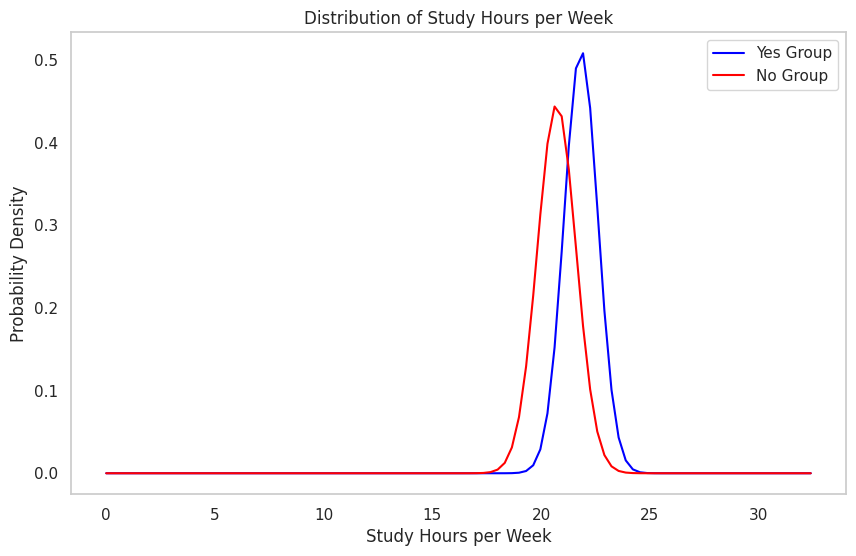

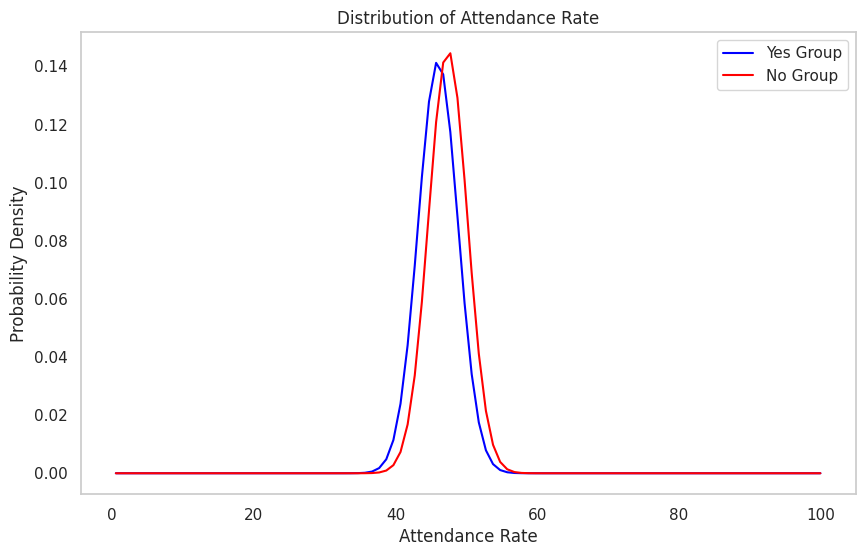

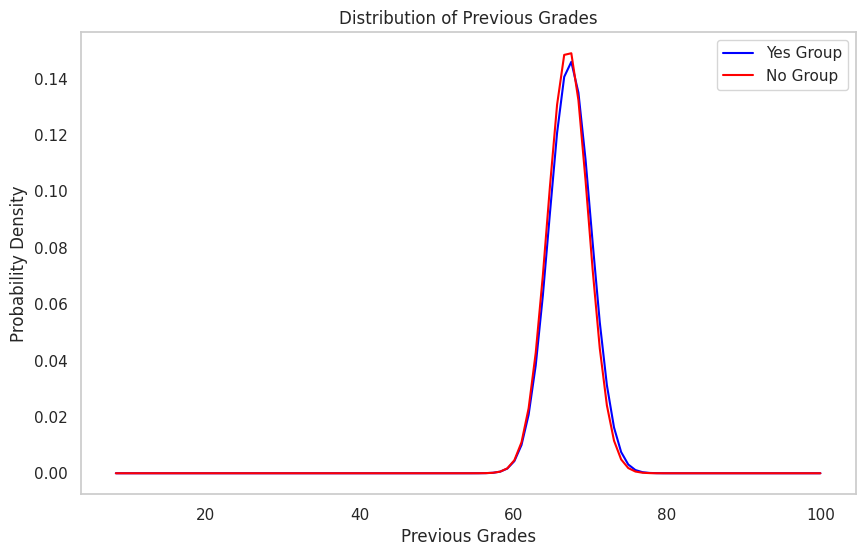

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import math
import matplotlib.pyplot as plt

# Tải dữ liệu từ file CSV
data = pd.read_csv("valid_records.csv")

# Chia dữ liệu thành hai nhóm dựa trên cột 'Passed'
group_yes = data[data['Passed'] == 'Yes']  # Nhóm những người đã vượt qua
group_no = data[data['Passed'] == 'No']    # Nhóm những người không vượt qua

# Danh sách các cột cần điền giá trị bị khuyết
columns_to_impute = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

# Hàm để điền giá trị bị khuyết cho một cột
def impute_missing_values(column):
    # Lấy các giá trị hiện có (không bị khuyết) từ cột
    x = column.dropna().values

    # Số lượng giá trị bị thiếu
    nMissing = column.isnull().sum()

    # Số lượng phần tử hiện có trong x
    n = x.size

    # Tính trung bình của dữ liệu hiện có (bỏ qua các giá trị bị thiếu)
    meanI = np.sum(x) / (n + nMissing)

    # Làm tròn giá trị trung bình để ước lượng giá trị bị thiếu ban đầu
    missingValue = np.round(meanI)

    # Khởi tạo giá trị trung bình trước đó để dùng trong vòng lặp
    meanPrevious = 0

    # Vòng lặp điều chỉnh giá trị trung bình dựa trên giá trị ước lượng
    while True:
        # Tính giá trị trung bình mới với sự tham gia của các giá trị bị thiếu ước lượng
        meanT = meanI + (missingValue * nMissing) / (n + nMissing)

        # Cập nhật giá trị bị thiếu với trung bình mới
        missingValue = meanT

        # Tính độ chênh lệch giữa trung bình hiện tại và trung bình trước đó
        meanDifference = meanT - meanPrevious
        meanPrevious = meanT

        # Nếu độ chênh lệch đủ nhỏ, thoát vòng lặp
        if np.abs(meanDifference) < 0.02:
            break

    # Điền giá trị bị thiếu vào cột gốc
    column.fillna(missingValue, inplace=True)

# Áp dụng hàm cho mỗi cột cần điền giá trị bị khuyết trong các nhóm
for column in columns_to_impute:
    impute_missing_values(group_yes[column])  # Điền giá trị cho nhóm 'Yes'
    impute_missing_values(group_no[column])    # Điền giá trị cho nhóm 'No'

# Kết hợp lại các nhóm sau khi điền giá trị
data.loc[group_yes.index, columns_to_impute] = group_yes[columns_to_impute]
data.loc[group_no.index, columns_to_impute] = group_no[columns_to_impute]

# Lưu dữ liệu đã điền giá trị bị khuyết vào file mới
output_file = 'imputed_data.csv'
data.to_csv(output_file, index=False)

#Tính likelihood để tìm cặp mean và sigma tốt nhất

# Bước 1: Đọc dữ liệu từ file imputed_data.csv
data = pd.read_csv('imputed_data.csv')  # Đọc dữ liệu từ file CSV vào DataFrame

# Bước 2: Chia dữ liệu thành hai nhóm dựa trên cột 'Pass'
group_yes = data[data['Passed'] == 'Yes']  # Nhóm dữ liệu có 'Pass' là 'Yes'
group_no = data[data['Passed'] == 'No']    # Nhóm dữ liệu có 'Pass' là 'No'

# Xác định các cột cần xử lý
columns_to_impute = ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']  # Các cột cần tính toán mu và sigma

# Bước 3: Tạo bins và tính mu (trung bình), sigma (độ lệch chuẩn) cho từng nhóm
mu_sigma_yes = {}  # Từ điển lưu trữ mu và sigma cho nhóm 'Yes'
mu_sigma_no = {}   # Từ điển lưu trữ mu và sigma cho nhóm 'No'

# Tính toán mu và sigma cho từng cột
for column in columns_to_impute:
    # Sử dụng KBinsDiscretizer để tạo 10 bins
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')  # Khởi tạo discretizer với 10 bins
    bins_yes = discretizer.fit_transform(group_yes[[column]]).astype(int)  # Tạo bins cho nhóm 'Yes'
    bins_no = discretizer.fit_transform(group_no[[column]]).astype(int)      # Tạo bins cho nhóm 'No'

    # Gán các bin vào nhóm
    group_yes['Bin'] = bins_yes  # Thêm cột 'Bin' vào nhóm 'Yes'
    group_no['Bin'] = bins_no;    # Thêm cột 'Bin' vào nhóm 'No'

    mu_sigma_yes[column] = {}  # Khởi tạo từ điển cho mu và sigma của nhóm 'Yes'
    for b in range(10):
        # Lấy các giá trị trong bin hiện tại
        subset = group_yes[group_yes['Bin'] == b][column]  # Các giá trị trong bin b
        # Tính mu và sigma cho bin đó
        mu_sigma_yes[column][b] = {
            'mu': np.mean(subset) if not subset.empty else np.nan,  # Tính trung bình, nếu không có dữ liệu thì gán NaN
            'sigma': np.std(subset) if not subset.empty else np.nan   # Tính độ lệch chuẩn
        }

    mu_sigma_no[column] = {}  # Khởi tạo từ điển cho mu và sigma của nhóm 'No'
    for b in range(10):
        subset = group_no[group_no['Bin'] == b][column]  # Các giá trị trong bin b
        mu_sigma_no[column][b] = {
            'mu': np.mean(subset) if not subset.empty else np.nan,  # Tính trung bình
            'sigma': np.std(subset) if not subset.empty else np.nan   # Tính độ lệch chuẩn
        }

# Bước 4: Tính toán log-likelihood và tìm cặp mu, sigma với logL nhỏ nhất
best_params_yes = {}  # Từ điển lưu trữ cặp mu và sigma tốt nhất cho nhóm 'Yes'
best_params_no = {}   # Từ điển lưu trữ cặp mu và sigma tốt nhất cho nhóm 'No'

# Tính toán log-likelihood cho mỗi cột
for column in columns_to_impute:
    best_logL_yes = float('inf')  # Khởi tạo log-likelihood tốt nhất cho nhóm 'Yes'
    best_mu_yes = None
    best_sigma_yes = None

    for b in range(10):
        mu = mu_sigma_yes[column][b]['mu']
        sigma = mu_sigma_yes[column][b]['sigma']

        # Xử lý nếu sigma = 0 hoặc NaN
        if sigma == 0 or np.isnan(sigma):
            continue  # Bỏ qua bin này vì không thể tính toán log-likelihood

        x_bin_yes = group_yes[group_yes['Bin'] == b][column].dropna().values
        n_bin_yes = len(x_bin_yes)

        if n_bin_yes > 0:  # Chỉ tính toán nếu có dữ liệu trong bin
            # Công thức log-likelihood
            logL_yes = -np.sum(np.square(x_bin_yes - mu) / (2 * np.square(sigma))) - \
                        (0.5 * n_bin_yes * np.log(2 * np.pi)) - n_bin_yes * np.log(sigma)

            # Kiểm tra và cập nhật logL tốt nhất nếu cần
            if not np.isnan(logL_yes) and not np.isinf(logL_yes) and logL_yes < best_logL_yes:
                best_logL_yes = logL_yes
                best_mu_yes = mu
                best_sigma_yes = sigma

    best_params_yes[column] = (best_mu_yes, best_sigma_yes)

    best_logL_no = float('inf')
    best_mu_no = None
    best_sigma_no = None

    for b in range(10):
        mu = mu_sigma_no[column][b]['mu']
        sigma = mu_sigma_no[column][b]['sigma']

        # Xử lý nếu sigma = 0 hoặc NaN
        if sigma == 0 or np.isnan(sigma):
            continue

        x_bin_no = group_no[group_no['Bin'] == b][column].dropna().values
        n_bin_no = len(x_bin_no)

        if n_bin_no > 0:
            logL_no = -np.sum(np.square(x_bin_no - mu) / (2 * np.square(sigma))) - \
                        (0.5 * n_bin_no * np.log(2 * np.pi)) - n_bin_no * np.log(sigma)

            if not np.isnan(logL_no) and not np.isinf(logL_no) and logL_no < best_logL_no:
                best_logL_no = logL_no
                best_mu_no = mu
                best_sigma_no = sigma

    best_params_no[column] = (best_mu_no, best_sigma_no)


# Bước 5: In ra cặp mu và sigma tốt nhất cho từng nhóm
print("\nBest mu and sigma for group 'Yes':")
for column, (mu, sigma) in best_params_yes.items():
    print(f"{column}: mu = {mu}, sigma = {sigma}")  # In ra kết quả cho nhóm 'Yes'

print("\nBest mu and sigma for group 'No':")
for column, (mu, sigma) in best_params_no.items():
    print(f"{column}: mu = {mu}, sigma = {sigma}")  # In ra kết quả cho nhóm 'No'

# Bước 6: Hàm để vẽ biểu đồ phân phối
def plot_distribution(column, mu_yes, sigma_yes, mu_no, sigma_no):
    # Tạo các điểm x cho biểu đồ
    x = np.linspace(min(data[column]), max(data[column]), 100)  # Tạo khoảng giá trị x
    # Tính hàm mật độ xác suất cho nhóm 'Yes'
    pdf_yes = (1 / (sigma_yes * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_yes) / sigma_yes) ** 2)
    # Tính hàm mật độ xác suất cho nhóm 'No'
    pdf_no = (1 / (sigma_no * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_no) / sigma_no) ** 2)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))  # Thiết lập kích thước biểu đồ
    plt.plot(x, pdf_yes, label='Yes Group', color='blue')  # Đường cho nhóm 'Yes'
    plt.plot(x, pdf_no, label='No Group', color='red')      # Đường cho nhóm 'No'
    plt.title(f'Distribution of {column}')  # Tiêu đề biểu đồ
    plt.xlabel(column)  # Nhãn cho trục x
    plt.ylabel('Probability Density')  # Nhãn cho trục y
    plt.legend()  # Hiển thị chú thích
    plt.grid()  # Thêm lưới vào biểu đồ
    plt.show()  # Hiển thị biểu đồ
    print()

# Bước 7: Vẽ biểu đồ cho từng cột
for column in columns_to_impute:
    mu_yes, sigma_yes = best_params_yes[column]  # Lấy mu và sigma cho nhóm 'Yes'
    mu_no, sigma_no = best_params_no[column]      # Lấy mu và sigma cho nhóm 'No'

    # Gọi hàm để vẽ biểu đồ phân phối cho từng cột
    plot_distribution(column, mu_yes, sigma_yes, mu_no, sigma_no)